In [1]:
#install conda install -c conda-forge scikit-allel
import pandas as pd
import allel
import numpy as np

In [2]:
samples=['AKR_J','A_J','BALB_cJ','C3H_HeJ','CBA_J','DBA_2J','LP_J']
# tools=['sniffles']
tools=['breakdancer',
#'clever',
'delly',
'gasv',
'gridss',
#'indelminer',
#'lumpexpress',
#'mistrvar',
#'pindel',
#'platypus',
'popdel',
'smoove',
'crest',
'genomestrip',
'manta_diploidSV'
#'sniffles'
]

In [ ]:
#tools
import os
from os import path

#cov_list=['32','8','4','2','1','0.5','0.1']
#cov_list=['32','8','4','2']
cov_list=['32','16','8','4','2','1','0.5','0.1']
#th_list=['1000']
th_list=['100']
n_list=['1','2','3','4','5','6','7','8','9','10']


#n_list=['1']


df= pd.DataFrame(columns=['strain','length','flag','position','threshold'])



for s in samples:
    print ("---",s,"---")
    for t in tools:
        for th in th_list: 
            for cov in cov_list:
                for n in n_list:
            
            
                    file='../Data/raw_data/mouse/custom_vcf_'+cov+'x/'+str(th)+'t/nf_'+str(th)+'t.'+t+'.'+s+'.chr19.'+cov+'p.'+n+'_sorted.modified.vcf'
            
                    if path.exists(file):
                        callset = allel.read_vcf(file,fields='*')
                        if callset!=None:
                            df_current = pd.DataFrame({'tool': t, 'strain': s, 'length': callset['variants/SVLEN'],'flag': callset['variants/FLAG'],'position': callset['variants/POS'],'threshold': th})
                            df_current['cov']=cov
                            df_current['n']=n
                            df = pd.concat([df_current, df],ignore_index=True) 
#                         else:
#                             print("Empty File: " + file)

#                     else:
#                         print("Nonexistant File: " + file)


--- AKR_J ---


/Users/ramayyala/opt/anaconda3/lib/python3.7/site-packages/allel/io/vcf_read.py:1745: UserWarning: multiple INFO headers for 'SVLEN'
  warnings.warn('multiple INFO headers for %r' % k)
/Users/ramayyala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



--- A_J ---
--- BALB_cJ ---
--- C3H_HeJ ---
--- CBA_J ---


In [ ]:
# df

In [ ]:
#tools
import os
from os import path

# cov_list=['32','8','4','2','1','0.5','0.1']

cov_list=['32','16','8','4','2','1','0.5','0.1']
th_list=['100']
#th_list=['1000']
n_list=['1','2','3','4','5','6','7','8','9','10']


#n_list=['1','2']


df_nondel= pd.DataFrame(columns=['strain','length','flag','position','threshold'])



for s in samples:
    print ("---",s,"---")
    for t in tools:
        for th in th_list: 
            for cov in cov_list:
                for n in n_list:
            
            
                    file='../Data/raw_data/mouse/custom_vcf_'+cov+'x/'+str(th)+'t/nf_'+str(th)+'t.'+t+'.'+s+'.chr19.'+cov+'p.'+n+'_sorted.modified.nondel.vcf'
            
                    if path.exists(file):
                        callset = allel.read_vcf(file,fields='*')
                        if callset!=None:
                            df_current = pd.DataFrame({'tool': t, 'strain': s, 'length': callset['variants/SVLEN'],'flag': callset['variants/FLAG'],'position': callset['variants/POS'],'threshold': th})
                            df_current['cov']=cov
                            df_current['n']=n
                            df_nondel = pd.concat([df_current, df_nondel],ignore_index=True)   
                    else:
                        print (file)

In [ ]:
df_nondel.head()

# group by TP

In [ ]:
group_data_TP=df[df['flag'] == 'TP'].groupby(['tool','threshold','strain','n','cov'],as_index=False)['flag'].count()
group_data_TP=group_data_TP.rename(columns={"flag": "nTP"})


group_data_TP[pd.isnull(group_data_TP).any(axis=1)]

In [ ]:
group_data_FP=df[df['flag'] == 'FP'].groupby(['tool','threshold','strain','n','cov'],as_index=False)['flag'].count()
group_data_FP=group_data_FP.rename(columns={"flag": "nFP"})
group_data_FP.tail()


group_data_FP[pd.isnull(group_data_FP).any(axis=1)]

In [ ]:
group_data_TN=df_nondel[df_nondel['flag'] == 'TN'].groupby(['tool','threshold','strain','n','cov'],as_index=False)['flag'].count()
group_data_TN=group_data_TN.rename(columns={"flag": "nTN"})


group_data_TN[pd.isnull(group_data_TN).any(axis=1)]


In [ ]:
#fill mssing combinations with 0s
for s in samples:
    for t in tools:
        for th in th_list:
            for cov in cov_list:
                for n in n_list:
                    if not (((group_data_TP['cov'] == cov) & (group_data_TP['n'] == n) & (group_data_TP['tool'] == t) & (group_data_TP['strain'] == s) & (group_data_TP['threshold'] == th)).any()):
                        group_data_TP = group_data_TP.append({'cov' : cov , 'n' : n , 'tool' : t , 'strain' : s,'threshold' : th,'nTP' : 0.0} , ignore_index=True)
group_data_TP[pd.isnull(group_data_TP).any(axis=1)]




In [ ]:
#fill mssing combinations with 0s
for s in samples:
    for t in tools:
        for th in th_list:
            for cov in cov_list:
                for n in n_list:
                    if not (((group_data_FP['cov'] == cov) & (group_data_FP['n'] == n) & (group_data_FP['tool'] == t) & (group_data_FP['strain'] == s) & (group_data_FP['threshold'] == th)).any()):
                        group_data_FP = group_data_FP.append({'cov' : cov , 'n' : n , 'tool' : t , 'strain' : s,'threshold' : th,'nFP' : 0.0} , ignore_index=True)
group_data_FP[pd.isnull(group_data_FP).any(axis=1)]


In [ ]:
#fill mssing combinations with 0s
for s in samples:
    for t in tools:
        for th in th_list:
            for cov in cov_list:
                for n in n_list:
                    if not (((group_data_TN['cov'] == cov) & (group_data_TN['n'] == n) & (group_data_TN['tool'] == t) & (group_data_TN['strain'] == s) & (group_data_TN['threshold'] == th)).any()):
                        group_data_TN = group_data_TN.append({'cov' : cov , 'n' : n , 'tool' : t , 'strain' : s,'threshold' : th,'nTN' : 0.0} , ignore_index=True)
group_data_TN[pd.isnull(group_data_TN).any(axis=1)]



In [ ]:
group_data_TN.head()

In [ ]:
#now both TP and FP are the size size and we can merge
df_merge=pd.merge(group_data_TP, group_data_FP,on=['tool','threshold','strain','n','cov'])
df_merge=pd.merge(df_merge, group_data_TN,on=['tool','threshold','strain','n','cov'])
df_merge[pd.isnull(df_merge).any(axis=1)]


In [ ]:
df_merge.head()

In [ ]:
#true SVs
df_current = pd.DataFrame(columns=['strain','length'])
df_true = pd.DataFrame(columns=['strain','length'])


for s in samples:
    file='../Data/gold_standard/mouse_vcf/'+s+'_reference.vcf'
    callset = allel.read_vcf(file,fields='*')
    
    df_current = pd.DataFrame({'strain': s, 'length': callset['variants/SVLEN']})
    df_true = pd.concat([df_current, df_true],ignore_index=True)
group_data_true = df_true.groupby(['strain'],as_index=False).count()
group_data_true=group_data_true.rename(columns={"length": "n_true"})
group_data_true

In [ ]:
df_merge=pd.merge(df_merge, group_data_true)
df_merge.head()

In [ ]:
df_merge.to_csv(r'Figure3_df_merge.csv')
# df_merge = pd.read_csv('Figure3_df_merge.csv')

In [ ]:
df_merge['nFN']=df_merge['n_true']-df_merge['nTP']
df_merge['sensitivity']=df_merge['nTP']/df_merge['n_true']
df_merge['precision']=df_merge['nTP']/(df_merge['nTP']+df_merge['nFP'])
df_merge['specificity']=df_merge['nTN']/(df_merge['nTN']+df_merge['nFP'])
df_merge['f-score']=2*(df_merge['sensitivity']*df_merge['precision'])/(df_merge['sensitivity']+df_merge['precision']+0.00000001)
df_merge = df_merge.replace(np.nan, 0)
df_merge.tail()


In [ ]:
df_sum=df_merge.groupby(['tool','threshold','cov','n'],as_index=False)['nTP','nFP','nFN','nTN'].sum()
df_sum.head()


In [ ]:
# df.sum

In [ ]:
df_sum.groupby(['tool'],as_index=False).count()

In [ ]:
df_merge_100=df_merge.loc[(df_merge['threshold'] =='100')]

df_merge_mean=df_merge_100.groupby(['tool','threshold','cov'],as_index=False)['sensitivity','precision','specificity','f-score'].mean()
df_merge_mean.head()

In [ ]:
# df_merge_1000=df_merge.loc[(df_merge['threshold'] =='1000')]

# df_merge_mean=df_merge_1000.groupby(['tool','threshold','cov'],as_index=False)['sensitivity','precision','specificity','f-score'].mean()
# df_merge_mean.head()

# Figure 4 (a)

In [ ]:
df_merge_mean.dtypes

In [ ]:
fig_order = ["indelminer","gasv","mistrvar","rdxplorer","popdel","pindel","BioGraph*","breakdancer","smoove","delly","gridss","clever","crest","genomestrip","manta_diploidSV"]
labels    = ["indelMINER","GASV","MiStrVar","RDXplorer","PopDel","Pindel","BioGraph*","BreakDancer","LUMPY","DELLY","GRIDSS","CLEVER","CREST","GenomeSTRiP","Manta"]
df_merge_mean["Tool"] = df_merge_mean["tool"].map(dict(zip(fig_order, labels)))


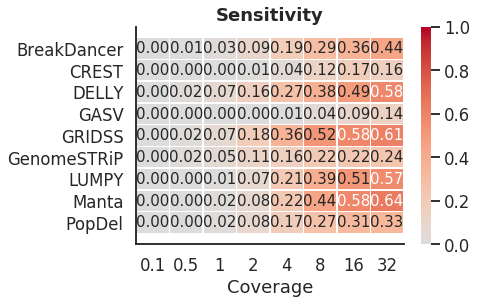

In [71]:
result = df_merge_mean.pivot(index='Tool', columns='cov', values='sensitivity')
result = result[['0.1','0.5','1','2','4','8','16','32']]

import matplotlib.pyplot as plt
import seaborn as sns

fig3a=sns.set_style("white")
fig3a=sns.set_context("talk")
fig3a=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)
fig3a.set(xlabel='Coverage', ylabel='')
plt.title('Sensitivity', weight='bold')
bottom, top = fig3a.get_ylim()
# print(bottom,top)
fig3a.set_ylim(bottom + 0.5, top - 0.5)
# fig3a.set_ylim(0, 1)
fig3a=sns.despine()
#plt.show(fig3a)
sns.set(font_scale=2)
plt.savefig("../Figures/fig4/mouse/Sensitivity.png",bbox_inches="tight")
plt.savefig("../Figures/fig4/mouseSensitivity.pdf",bbox_inches="tight")

# Figure 4 (b)

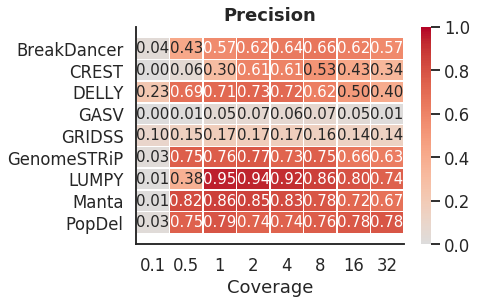

In [72]:
result = df_merge_mean.pivot(index='Tool', columns='cov', values='precision')
result = result[['0.1','0.5','1','2','4','8','16','32']]

import matplotlib.pyplot as plt
import seaborn as sns

fig3b=sns.set_style("white")
fig3b=sns.set_context("talk")
fig3b=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)
fig3b.set(xlabel='Coverage', ylabel='')
plt.title('Precision', weight='bold')
bottom, top = fig3b.get_ylim()
fig3b.set_ylim(bottom + 0.5, top - 0.5)

fig3b=sns.despine()
#plt.show(fig3b)
sns.set(font_scale=2)
plt.savefig("../Figures/fig4/mouse/Precision.png",bbox_inches="tight")
plt.savefig("../Figures/fig4/mouse/Precision.pdf",bbox_inches="tight")

# Figure 4 (c)

In [73]:
# df_merge_mean

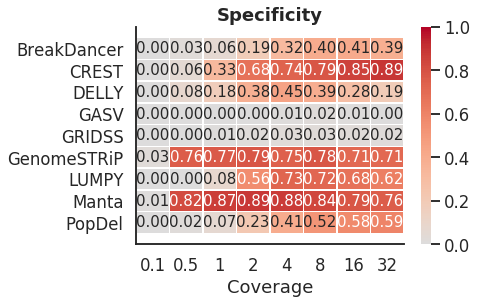

In [74]:
result = df_merge_mean.pivot(index='Tool', columns='cov', values='specificity')
result = result[['0.1','0.5','1','2','4','8','16','32']]

import matplotlib.pyplot as plt
import seaborn as sns

fig3c=sns.set_style("white")
fig3c=sns.set_context("talk")
fig3c=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)
fig3c.set(xlabel='Coverage', ylabel='')
plt.title('Specificity', weight='bold')
bottom, top = fig3c.get_ylim()
fig3c.set_ylim(bottom + 0.5, top - 0.5)

fig3c=sns.despine()
#plt.show(fig3c)
sns.set(font_scale=2)
plt.savefig("../Figures/fig4/mouse/Specificity.png",bbox_inches="tight")
plt.savefig("../Figures/fig4/mouse/Specificity.pdf",bbox_inches="tight")

# Figure 4(d)

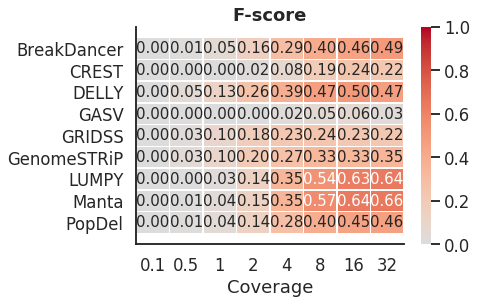

In [75]:
result = df_merge_mean.pivot(index='Tool', columns='cov', values='f-score')
result = result[['0.1','0.5','1','2','4','8','16','32']]

import matplotlib.pyplot as plt
import seaborn as sns

fig3d=sns.set_style("white")
fig3d=sns.set_context("talk")
fig3d=sns.heatmap(result, annot=True, cmap='coolwarm',center=0,linewidths=.5,annot_kws={'size':15},fmt=".2f",vmin=0, vmax=1)
fig3d.set(xlabel='Coverage', ylabel='')
plt.title('F-score', weight='bold')
bottom, top = fig3d.get_ylim()
fig3d.set_ylim(bottom + 0.5, top - 0.5)

fig3d=sns.despine()
# plt.show(fig3d)
sns.set(font_scale=2)
plt.savefig("../Figures/fig4/mouse/Fscore.png",bbox_inches="tight")
plt.savefig("../Figures/fig4/mouse/Fscore.pdf",bbox_inches="tight")


In [76]:
df_merge.to_csv('../Data/analysis_files/df_merge.csv',index=False)
df_sum.to_csv('../Data/analysis_files/df_sum.csv',index=False)